## Question 3 PCA:


In [89]:
#importing numpy, pandas, matplot, seaborn libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload() #uploading file from local storage
for fn in uploaded.keys():
  print('file uploaded is "{name}" '.format(name=fn))

Saving DataPCA.csv to DataPCA (7).csv
file uploaded is "DataPCA.csv" 


In [90]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import KernelPCA #decomposing multivariate dataset into simgular values
df_PCA = pd.read_csv("DataPCA.csv") #reading and displaying Principal component Analysis file
display(df_PCA)

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


## a. Visualize the data from the file DataPCA.csv.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5af8288b50>,
      dtype=object)

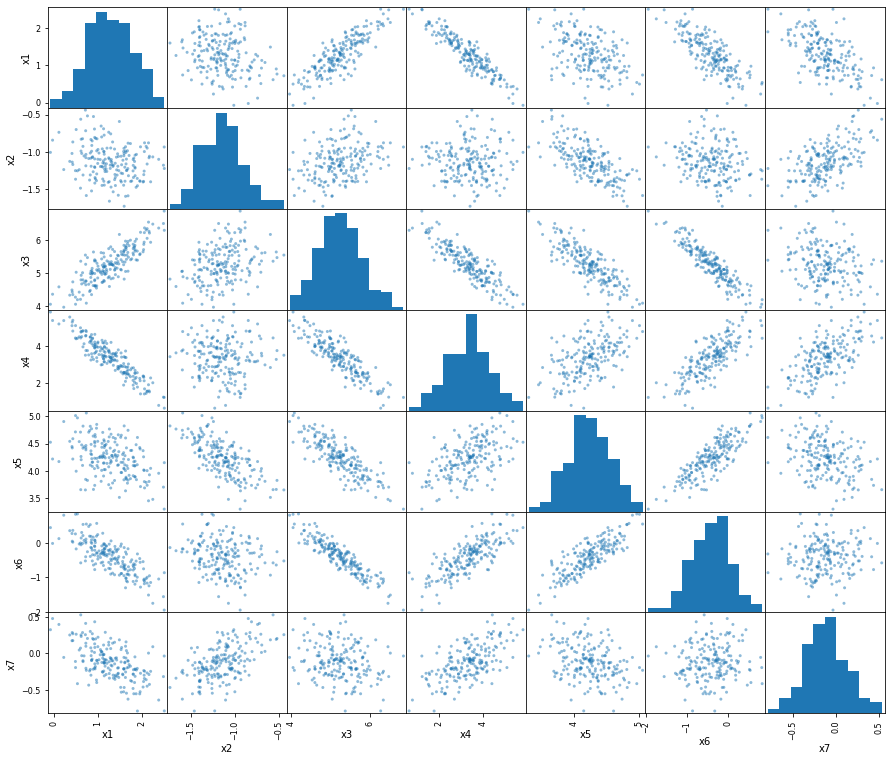

In [91]:
#https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
#https://in.mathworks.com/matlabcentral/answers/1451634-scatter-plot-data-that-meet-a-condition
pd.plotting.scatter_matrix(df_PCA, alpha=0.5, figsize= (15, 13)) #plotting scalar matrices

## b. Train PCA

In [92]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA #importing libreries
pca = PCA(n_components = 'mle', random_state = 15) #defining PCA 
pca.fit(df_PCA) #training after fitting the data

PCA(n_components='mle', random_state=15)

##c. Plot the variance explained versus PCA dimensions

In [93]:
#https://plotly.com/python/plotly-express/
import plotly.express as px #for creating entire figures/graphs at once
#https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
v_xp = np.cumsum(pca.explained_variance_ratio_) # variance, with cumulative sum
px.area(x=range(1, v_xp.shape[0] + 1), y=v_xp, labels={"x": "dimensions of PCA ", "y": "Variance Explained "}) # to show stacked are in polyline form

## d. Reconstruct the data with various numbers of PCA dimensions, and compute the MSE.

In [94]:
# reconstructing for 5 dimension
# https://towardsdatascience.com/dimensionality-reduction-with-pca-from-basic-ideas-to-full-derivation-37921e13cae7
pca = PCA(n_components = 5).fit(df_PCA)

comp = pca.transform(df_PCA) #transforming pca data
df_comp = pd.DataFrame(data = comp, columns = ['PCA 1', 'PCA 2', 'PCA 3','PCA 4','PCA 5']) # renaming and impprting into columns 
#https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html
prjkt = pca.inverse_transform(df_comp)
df_projected = pd.DataFrame(data = prjkt) #projecting inverse of transformed PCA
display(df_comp) #displaying

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5
0,-1.139955,0.204632,-0.026483,-0.002157,-0.000984
1,0.025351,-0.105805,0.007096,0.022509,0.002877
2,0.351524,0.456331,-0.399527,0.036157,0.012919
3,-2.694955,0.277251,-0.136291,0.114828,0.003183
4,0.949226,-0.176086,0.147585,-0.064491,-0.003973
...,...,...,...,...,...
185,-1.139749,-0.446978,0.098526,-0.043290,0.000082
186,-0.953267,-0.319571,0.128471,-0.013505,0.015529
187,0.833829,0.152804,-0.279758,-0.036809,0.006224
188,0.574174,-0.089858,-0.304411,0.050415,0.017344


In [95]:
from sklearn.metrics import mean_squared_error #importing librrery for mean squre error
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
MSE = mean_squared_error(y_true = df_projected, y_pred = df_PCA)

display(df_projected) #showing projected data and printing MSE
print('Mean squre error for 4 PCA dimension is',MSE)

,0,1,2,3,4,5,6
0,0.837132,-1.090026,4.865581,4.273309,4.315085,-0.138518,0.075987
1,1.325374,-1.168675,5.242280,3.295340,4.282799,-0.364663,-0.170962
2,1.538427,-1.174197,5.556033,3.394514,3.972952,-0.889322,0.080125
3,0.363829,-1.131375,4.329269,5.547212,4.538273,0.343093,0.252380
4,1.566221,-1.114816,5.544489,2.493462,4.158820,-0.610768,-0.292005
...,...,...,...,...,...,...,...
185,0.886919,-1.274564,4.627671,4.006283,4.640952,0.154557,-0.216239
186,0.928706,-1.202778,4.763402,3.907350,4.535558,0.074204,-0.197377
187,1.681691,-1.225672,5.610087,2.864232,4.043556,-0.905496,-0.098533
188,1.691660,-1.324310,5.472524,3.023708,4.209644,-0.694229,-0.189312


Mean squre error for 4 PCA dimension is 4.972270833280484e-06


# Computing MSE for reduction to 4 dimension

In [96]:
# reconstructing for 4 dimension
# https://towardsdatascience.com/dimensionality-reduction-with-pca-from-basic-ideas-to-full-derivation-37921e13cae7
pca = PCA(n_components = 4).fit(df_PCA)

comp = pca.transform(df_PCA) #transforming pca data
df_comp = pd.DataFrame(data = comp, columns = ['PCA 1', 'PCA 2', 'PCA 3','PCA 4']) # renaming and impprting into columns 
#https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html
prjkt = pca.inverse_transform(df_comp)
df_projected = pd.DataFrame(data = prjkt) #projecting inverse of transformed PCA
display(df_comp) #displaying


,PCA 1,PCA 2,PCA 3,PCA 4
0,-1.139955,0.204632,-0.026483,-0.002157
1,0.025351,-0.105805,0.007096,0.022509
2,0.351524,0.456331,-0.399527,0.036157
3,-2.694955,0.277251,-0.136291,0.114828
4,0.949226,-0.176086,0.147585,-0.064491
...,...,...,...,...
185,-1.139749,-0.446978,0.098526,-0.043290
186,-0.953267,-0.319571,0.128471,-0.013505
187,0.833829,0.152804,-0.279758,-0.036809
188,0.574174,-0.089858,-0.304411,0.050415


In [97]:
from sklearn.metrics import mean_squared_error #importing librrery for mean squre error
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
MSE = mean_squared_error(y_true = df_projected, y_pred = df_PCA)

display(df_projected) #showing projected data and printing MSE
print('mean squre error for 4 PCA dimension is',MSE)

,0,1,2,3,4,5,6
0,0.837042,-1.090052,4.865619,4.273542,4.314689,-0.138678,0.075138
1,1.325635,-1.168601,5.242167,3.294659,4.283956,-0.364194,-0.168478
2,1.539601,-1.173862,5.555527,3.391455,3.978149,-0.887215,0.091277
3,0.364118,-1.131292,4.329144,5.546458,4.539553,0.343613,0.255127
4,1.565860,-1.114919,5.544645,2.494403,4.157222,-0.611416,-0.295435
...,...,...,...,...,...,...,...
185,0.886926,-1.274562,4.627668,4.006264,4.640985,0.154571,-0.216168
186,0.930117,-1.202375,4.762793,3.903672,4.541804,0.076737,-0.183973
187,1.682256,-1.225511,5.609843,2.862758,4.046059,-0.904481,-0.093161
188,1.693236,-1.323860,5.471845,3.019601,4.216620,-0.691400,-0.174341


mean squre error for 4 PCA dimension is 3.028954394737663e-05



 ## Observation and conclusion:
 After importing libreries, we plotted scalar matrices in which most of the data were near to zero. by decomposing given data, we defined PCA and created plot of variance vs PCA dimension. after these steps we have reconstructed data into 4 and 5 dimensions and projected inverse of those. for all displayed data mean squre error and plotted in which from dimensions 3, variance converge to unity. after that we have computed mse for data with 4 and 5 dimensions

 ## Refrences
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
https://in.mathworks.com/matlabcentral/answers/1451634-scatter-plot-data-that-meet-a-condition
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://towardsdatascience.com/dimensionality-reduction-with-pca-from-basic-ideas-to-full-derivation-37921e13cae7
https://towardsdatascience.com/dimensionality-reduction-with-pca-from-basic-ideas-to-full-derivation-37921e13cae7
https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

NOTE: 
We have discussed this question with our classmate Ambadas Maske and Harshit Agrawal

 